# Overview

In this Lab, we will cover


*   Simple linear regression
*   K-fold validation




# Initial Setup

Upload the provided files to the Session Storage
  - `income.data.csv`

In [4]:
df = read.csv('income.data.csv')
df

X,income,happiness
<int>,<dbl>,<dbl>
1,3.862647,2.314489
2,4.979381,3.433490
3,4.923957,4.599373
4,3.214372,2.791114
5,7.196409,5.596398
6,3.729643,2.458556
7,4.674517,3.192992
8,4.498104,1.907137
9,3.121631,2.942450


In [5]:
summary(df)

       X             income        happiness    
 Min.   :  1.0   Min.   :1.506   Min.   :0.266  
 1st Qu.:125.2   1st Qu.:3.006   1st Qu.:2.266  
 Median :249.5   Median :4.424   Median :3.473  
 Mean   :249.5   Mean   :4.467   Mean   :3.393  
 3rd Qu.:373.8   3rd Qu.:5.992   3rd Qu.:4.503  
 Max.   :498.0   Max.   :7.482   Max.   :6.863  

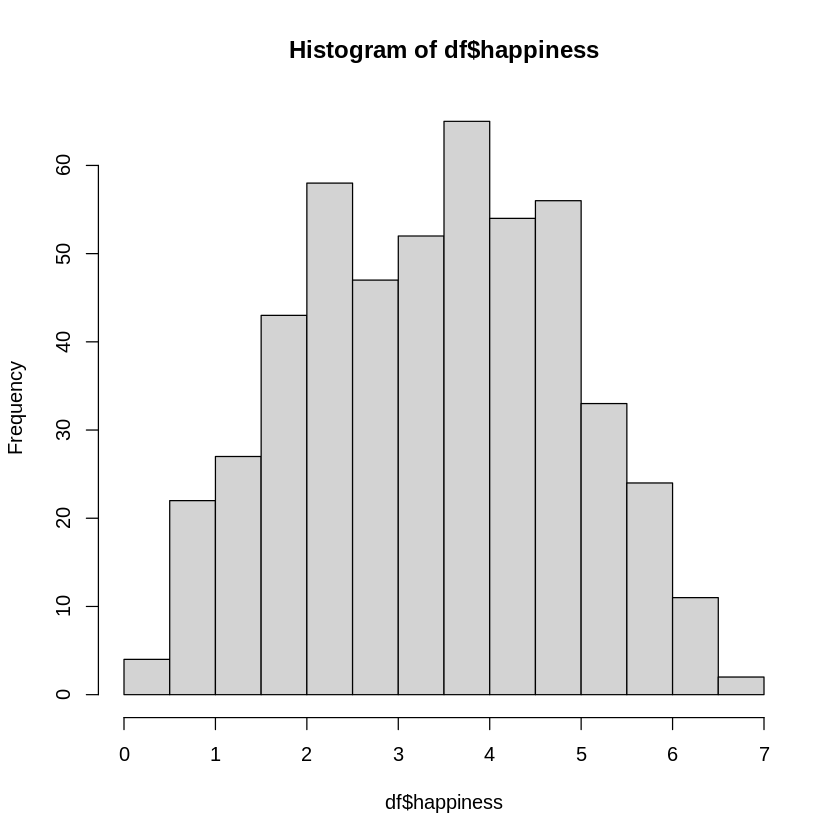

In [6]:
hist(df$happiness)

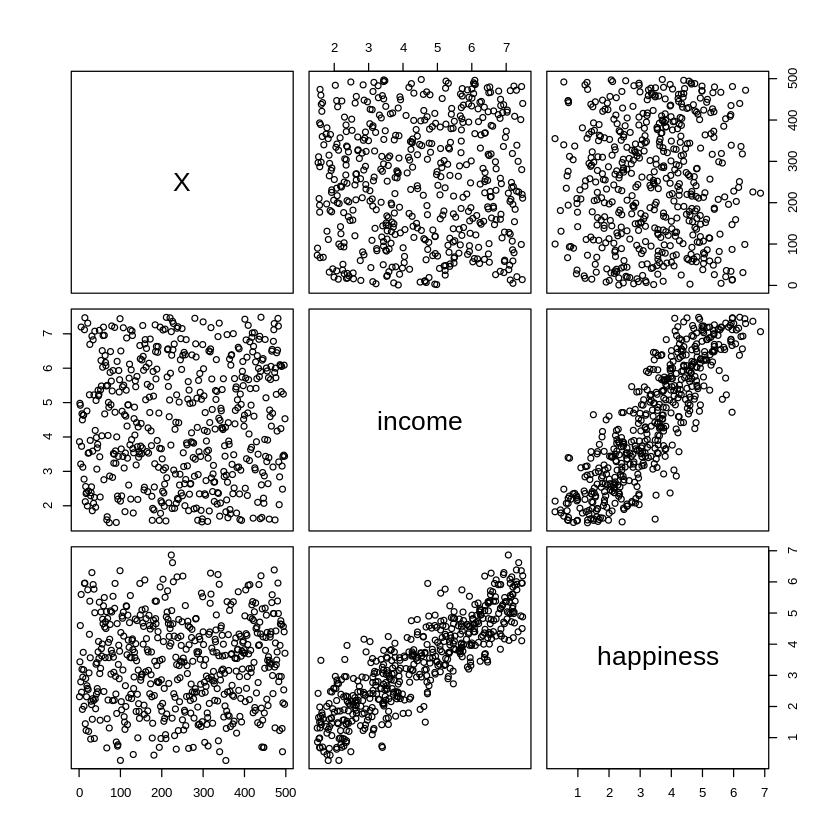

In [7]:
plot(df)

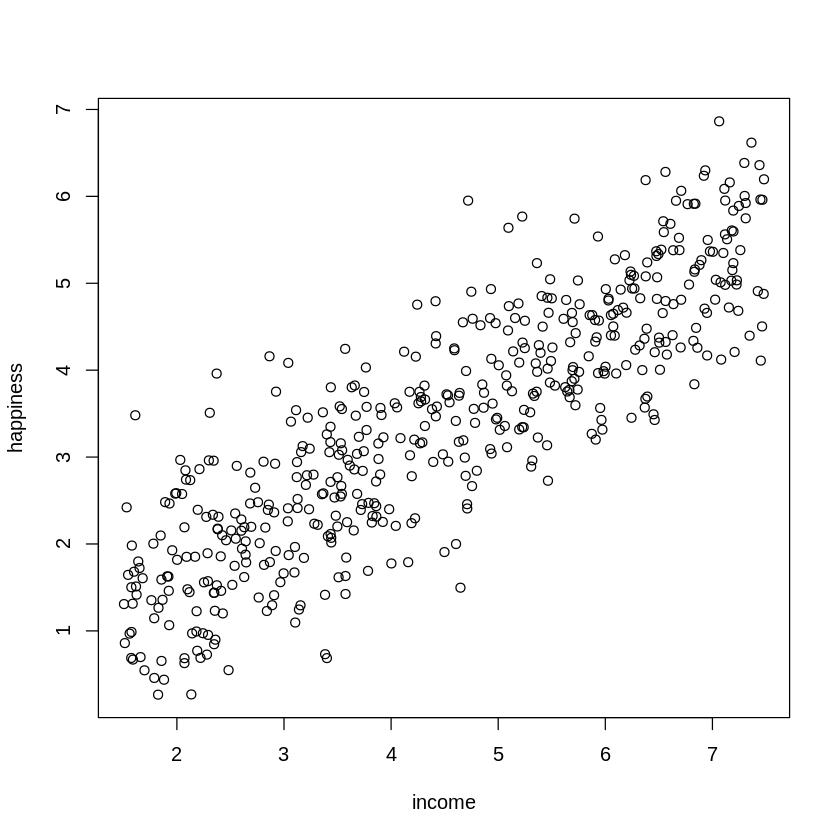

In [8]:
plot (happiness ~ income, data=df)

In [9]:
# Create a linear regression model for the whole data set as an example
model1 <- lm(happiness ~ income, data = df)    # lm([target] ~ [predictor], data =[data source])
summary(model1)


Call:
lm(formula = happiness ~ income, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02479 -0.48526  0.04078  0.45898  2.37805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20427    0.08884   2.299   0.0219 *  
income       0.71383    0.01854  38.505   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7181 on 496 degrees of freedom
Multiple R-squared:  0.7493,	Adjusted R-squared:  0.7488 
F-statistic:  1483 on 1 and 496 DF,  p-value: < 2.2e-16


In [10]:
# Example of how to get prediction of the current dataset
model1_prediction <-predict(model1)

In [11]:
# Model evaluation
# Calculate residuals
residuals <- df$happiness - model1_prediction

# Calculate RMSE
rmse <- sqrt(mean(residuals^2))

# Print RMSE
print(paste("RMSE:", rmse))

[1] "RMSE: 0.716657076312423"


In [16]:
# Split the dataset into train and test by ratio 80/20
sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.8,0.2))
train_set <- df[sample, ]
test_set <- df[!sample,]

In [18]:
print(nrow(train_set))
print(nrow(test_set))

[1] 401
[1] 97


## Task 1
*   Create a simple_regression_model with the train_set
*   Show the model summary
*   Predict happiness of test set
*   Calculate the rmse of the predicted happiness and actual happiness


In [35]:
##  Write code here
#   Create a simple_regression_model with the train_set
#   show the model summary
simple_regression_model <- lm(happiness ~ income, data = train_set)
summary(simple_regression_model)


Call:
lm(formula = happiness ~ income, data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93832 -0.47580  0.03795  0.48280  2.38278 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.19334    0.09942   1.945   0.0525 .  
income       0.71514    0.02078  34.408   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7105 on 399 degrees of freedom
Multiple R-squared:  0.7479,	Adjusted R-squared:  0.7473 
F-statistic:  1184 on 1 and 399 DF,  p-value: < 2.2e-16


In [39]:
# write code here to predict happiness of the test_set
test_set_prediction <- predict(simple_regression_model, newdata = test_set)

In [52]:
# Write code here to get the rmse of the predictions
# Calculate residuals
residuals <- test_set$happiness - test_set_prediction
# Calculate RMSE
rmse <- sqrt(mean(residuals^2))
# Print RMSE
print(paste("RMSE:", rmse))

[1] "RMSE: 0.748686532403105"


# K-fold validation

## Manual K-fold validation

Cross-validation is an great technique for model evaluation that allows us to understand both bias and variance components in the models we are building. Specifically, cross-validation helps assess how well a model generalizes to new data by partitioning the dataset into subsets which are used for training and testing.

We will explore how to perform k-fold cross-validation for linear regression on the mtcars dataset. The mtcars dataset, which is included in the R environment, provides information on various aspects of 32 different car models. It is derived from the Motor Trend Car Road Tests published in 1973.

In [26]:
data(mtcars)

In [27]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


As a first step, let’s create a linear model to predict qsec from hp.

If you want to learn more about the summary result, you can check out this youtube video: https://www.youtube.com/watch?v=wsi0jg_gH28

## Task 2a


1.   create a simple linear regression model called 'qsec_hp_model'  where target is qsec and predictor is hp
2.   show model summary



In [53]:
# Write code here
# lm([target] ~ [predictor], data =[data source])
qsec_hp_model <- lm(qsec ~ hp, data = mtcars)
summary(qsec_hp_model)


Call:
lm(formula = qsec ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1766 -0.6975  0.0348  0.6520  4.0972 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.556354   0.542424  37.897  < 2e-16 ***
hp          -0.018458   0.003359  -5.495 5.77e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.282 on 30 degrees of freedom
Multiple R-squared:  0.5016,	Adjusted R-squared:  0.485 
F-statistic: 30.19 on 1 and 30 DF,  p-value: 5.766e-06


In our linear model output, we can see a lot of helpful metrics, such as the residual standard error, which is a measure of the variability of the observed responses around the fitted regression line. Helpfully, the RSE metric is on the same scale as the data. It represents the standard deviation of the residuals in the units of the response variable. So the standard deviation of the errors in quarter-mile-times is 1.28.

The RSE is similar to, but not the same as, the root mean squared error, which is typically reported as an error metric of a model on new data. While the residual standard error is primarily used during the model fitting process, the root mean squared error is used for model evaluation and comparison. Specifically, RMSE calculates the square root of the mean of the squared differences between predicted and observed values and provides a measure of the average prediction error of the model on new, unseen data.

Even though it’s not so customary to report the RMSE on a model without looking at testing data, let’s report the statistic here just for reference before we work through cross-validation.

## Task 2b

*   get the rmse value of the predictions




In [63]:
# Write code here
mean_value <- mean(mtcars$qsec)
std_dev <- sd(mtcars$qsec)
print(paste("Mean:", mean_value))
print(paste("Standard Deviation:", std_dev))
# Get predicted values from the model
qsec_hp_model_prediction <- predict(qsec_hp_model)
# Calculate residuals
residuals <- mtcars$qsec - qsec_hp_model_prediction
# Calculate RMSE
rmse <- sqrt(mean(residuals^2))
# Print RMSE
print(paste("RMSE:", rmse))

[1] "Mean: 17.84875"
[1] "Standard Deviation: 1.78694323609684"
[1] "RMSE: 1.24169286211893"


Here we see an RMSE value of 1.24. But we have to remember that calculating the RMSE on the data used to train the model can give a optimistic estimate of the model’s performance. This is because the model has already seen this data during training, and it’s optimized to minimize errors on the dataset that we used.

All this is to say that, while the RSE reflects the residual variance component of the model by quantifying the spread or dispersion of the residuals around the regression line, it does not directly assess bias or generalization performance. RMSE, on the other hand, helps evaluate the bias-variance tradeoff of the model. It measures both bias by looking at how well the model fits the training data, and model variance, by looking at how well the model generalizes to new data.

K-fold cross-validation is a clever way to understand RMSE by using only the data we have at hand. Let’s start by performing k-fold cross-validation from scratch using tidyverse functions. As a first step, we need to create partitions. We do this by creating a new column called fold_number and dividing our dataset into four smaller ones.

In [56]:
# Load the packages
library(tidyverse)

mtcars %>%
  mutate(fold_number = rep(c("Fold1", "Fold2", "Fold3", "Fold4"), length.out = n())) -> mtcars

# Create separate dataframes for each fold
everything_except_fold1 <- filter(mtcars, fold_number != "Fold1")
everything_except_fold2 <- filter(mtcars, fold_number != "Fold2")
everything_except_fold3 <- filter(mtcars, fold_number != "Fold3")
everything_except_fold4 <- filter(mtcars, fold_number != "Fold4")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


As a next step, we create linear models. We create linear models for four different groups, meaning we train our model on, for example, the whole dataset except for one of the folds, and we do this four times.

In [57]:
# Create linear models for each fold
model_fold_2_3_4 <- lm(qsec ~ hp, data = everything_except_fold1)
model_fold_3_4_1 <- lm(qsec ~ hp, data = everything_except_fold2)
model_fold_4_1_2 <- lm(qsec ~ hp, data = everything_except_fold3)
model_fold_1_2_3 <- lm(qsec ~ hp, data = everything_except_fold4)

After we have created our models, we can now queue up our test data. We make predictions on our test data using the relevant models from training.

In [58]:
fold1 <- filter(mtcars, fold_number == "Fold1")
fold2 <- filter(mtcars, fold_number == "Fold2")
fold3 <- filter(mtcars, fold_number == "Fold3")
fold4 <- filter(mtcars, fold_number == "Fold4")

In [59]:
# Predict using model_fold1 on fold 2, 3, and 4
predictions_fold1 <- predict(model_fold_2_3_4, newdata = fold1)
predictions_fold2 <- predict(model_fold_3_4_1, newdata = fold2)
predictions_fold3 <- predict(model_fold_4_1_2, newdata = fold3)
predictions_fold4 <- predict(model_fold_1_2_3, newdata = fold4)

Finally, in order to evaluate how well each model performed, we can calculate the root mean squared error for each partition, and then aggregate to create an average.

In [60]:
# Calculate RMSE for each fold
rmse_fold1 <- sqrt(mean((fold1$qsec - predictions_fold1)^2))
rmse_fold2 <- sqrt(mean((fold2$qsec - predictions_fold2)^2))
rmse_fold3 <- sqrt(mean((fold3$qsec - predictions_fold3)^2))
rmse_fold4 <- sqrt(mean((fold4$qsec - predictions_fold4)^2))

# Print RMSE for each fold
print(paste("RMSE for Fold 1:", rmse_fold1))
print(paste("RMSE for Fold 2:", rmse_fold2))
print(paste("RMSE for Fold 3:", rmse_fold3))
print(paste("RMSE for Fold 4:", rmse_fold4))

(rmse_fold1 + rmse_fold2 + rmse_fold3 + rmse_fold4) / 4

[1] "RMSE for Fold 1: 1.84892930460792"
[1] "RMSE for Fold 2: 1.13286100962225"
[1] "RMSE for Fold 3: 1.205018136554"
[1] "RMSE for Fold 4: 0.873859123165325"


[1] 1.265167

Here we see an average root mean squared error of 1.27. Our RMSE of 1.27 means that, on average, our model’s predictions of qsec are off from the actual values by about 1.27 seconds.

As a final step, just so we can visualize what is happening, we create graphs to show our linear model on each fold, as well as actual vs. residual plots to show the error of each model’s predictions on their test sets.

To learn how to use ggplot, do check out this youtube video: https://www.youtube.com/watch?v=HPJn1CMvtmI

In [61]:
install.packages('patchwork')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


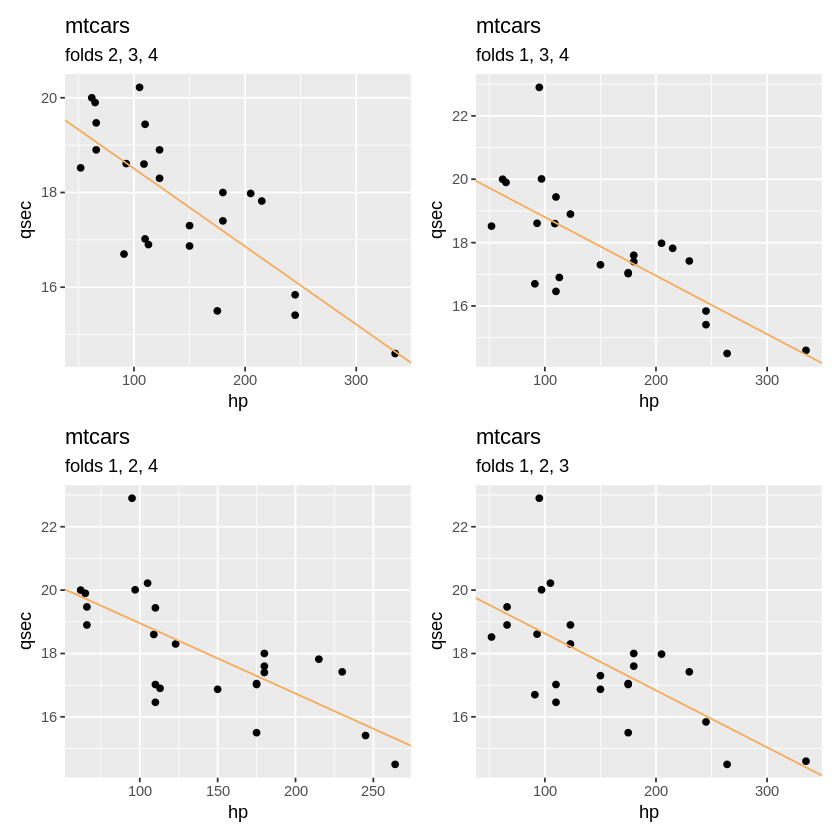

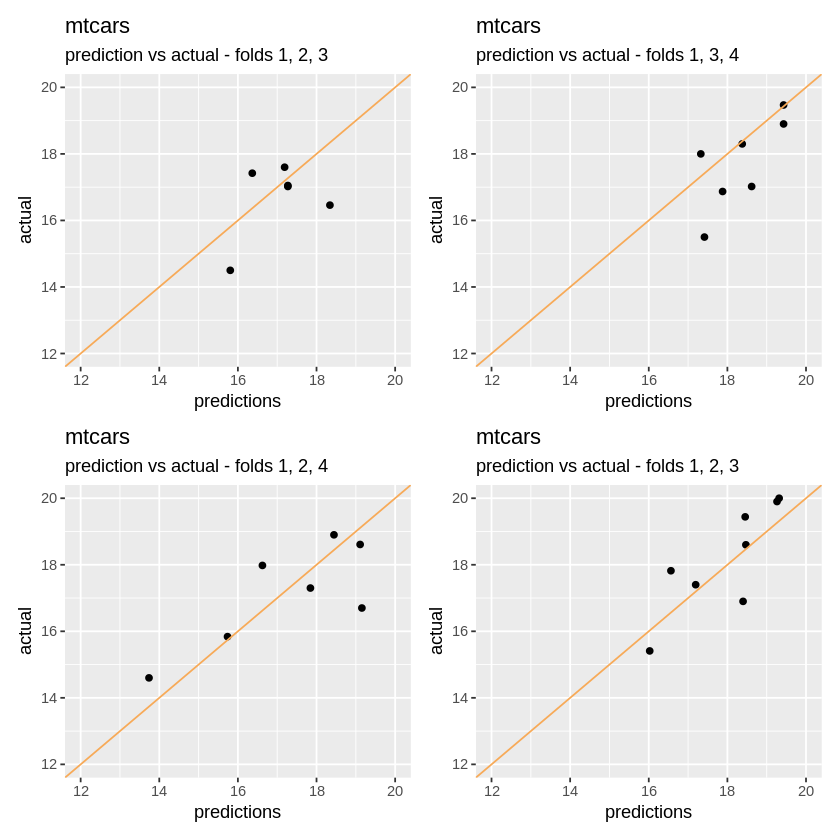

In [62]:
one <- ggplot(everything_except_fold1, aes(x = hp, y = qsec)) +
  geom_point() +
  geom_abline(intercept = model_fold_2_3_4$coefficients[1], slope = model_fold_2_3_4$coefficients[2], color = "#f7aa58") +
  ggtitle("mtcars") + labs(subtitle = 'folds 2, 3, 4')

two <- ggplot(everything_except_fold2, aes(x = hp, y = qsec)) +
  geom_point() +
  geom_abline(intercept = model_fold_3_4_1$coefficients[1], slope = model_fold_3_4_1$coefficients[2], color = "#f7aa58") +
  ggtitle("mtcars") + labs(subtitle = 'folds 1, 3, 4')

three <- ggplot(everything_except_fold3, aes(x = hp, y = qsec)) +
  geom_point() +
  geom_abline(intercept = model_fold_4_1_2$coefficients[1], slope = model_fold_4_1_2$coefficients[2], color = "#f7aa58") +
  ggtitle("mtcars") + labs(subtitle = 'folds 1, 2, 4')

four <- ggplot(everything_except_fold4, aes(x = hp, y = qsec)) +
  geom_point() +
  geom_abline(intercept = model_fold_1_2_3$coefficients[1], slope = model_fold_1_2_3$coefficients[2], color = "#f7aa58") +
  ggtitle("mtcars") + labs(subtitle = 'folds 1, 2, 3')

library(patchwork)

one + two + three + four


df1 <- data.frame(fold1$qsec, predictions_fold1)

one <- ggplot(df1, aes(y = fold1.qsec, x = predictions_fold1)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "#f7aa58") +
  ggtitle("mtcars") + labs(subtitle = 'prediction vs actual - folds 1, 2, 3') +
  xlim(12, 20) + ylim(12, 20) +
  xlab("predictions") + ylab("actual")

df2 <- data.frame(fold2$qsec, predictions_fold2)

two <- ggplot(df2, aes(y = fold2.qsec, x = predictions_fold2)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "#f7aa58") +
  ggtitle("mtcars") + labs(subtitle = 'prediction vs actual - folds 1, 3, 4') +
  xlim(12, 20) + ylim(12, 20) +
  xlab("predictions") + ylab("actual")

df3 <- data.frame(fold3$qsec, predictions_fold3)

three <- ggplot(df3, aes(y = fold3.qsec, x = predictions_fold3)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "#f7aa58") +
  ggtitle("mtcars") + labs(subtitle = 'prediction vs actual - folds 1, 2, 4') +
  xlim(12, 20) + ylim(12, 20) +
  xlab("predictions") + ylab("actual")

df4 <- data.frame(fold4$qsec, predictions_fold4)

four <- ggplot(df4, aes(y = fold4.qsec, x = predictions_fold4)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "#f7aa58") +
  ggtitle("mtcars") + labs(subtitle = 'prediction vs actual - folds 1, 2, 3') +
  xlim(12, 20) + ylim(12, 20) +
  xlab("predictions") + ylab("actual")

library(patchwork)

one + two + three + four